### Ndagire Catherine

### M24B38/004

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#import the dataset and rename it
remedial = pd.read_csv("Assignment_4_Remedial.csv")
remedial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

The dataset has 18 variables with 319795 samples. There are 4 continuous variables and 14 categorical variables.

## Number_1

## It is believed that variables "BMI" and "AgeCategory" are key indicators of "KidneyDisease". Is this true?

In [47]:
# Statistical relationship between BMI and KidneyDisease
from scipy.stats import f_oneway

def anova(remedial, BMI, KidneyDisease):
    Group_data = [
        group[BMI].values for _, group in remedial.groupby(KidneyDisease)
    ]
    f_starts, p_value = f_oneway(*Group_data)
    if p_value > 0.05:
        print(f"p_value is {p_value} hence {BMI} is not correlated with {KidneyDisease}.")
    elif p_value < 0.05:
        print(f"p_value is {p_value} hence {BMI} is correlated with {KidneyDisease}.")

anova(remedial, 'BMI', 'KidneyDisease')


p_value is 1.7223211696873605e-181 hence BMI is correlated with KidneyDisease.


In [48]:
# Statistical relationship between AgeCategory and KidneyDisease
age_kidney = pd.crosstab(index = remedial['AgeCategory'], columns=remedial['KidneyDisease'])

from scipy.stats import chi2_contingency
chi_sq_result = chi2_contingency(age_kidney)
print(f"p_value is {chi_sq_result[1]}.")


p_value is 0.0.


From the above tests we notice that the p-values for both BMI and AgeCategory in relation to KidneyDisease are less than 0.05 which implies that both BMI and AgeCategory are correlated with KidneyDisease. Hence BMI and AgeCategory are key indicators of KidneyDisease.

## Number_2

## Explain the distribution of probability of any continuous variable.

In [13]:
#distribution of probability of BMI
#First I am going to find the probability of the BMI variable.
BMI_probabilities = remedial['BMI'].value_counts(normalize=True).sort_index()
BMI_probabilities

BMI
12.02    0.000006
12.08    0.000003
12.13    0.000003
12.16    0.000003
12.20    0.000003
           ...   
92.53    0.000003
93.86    0.000003
93.97    0.000003
94.66    0.000003
94.85    0.000003
Name: proportion, Length: 3604, dtype: float64

The probability of each Body Mass Index is the same which is 0.000003 apart from one which is 0.000006.

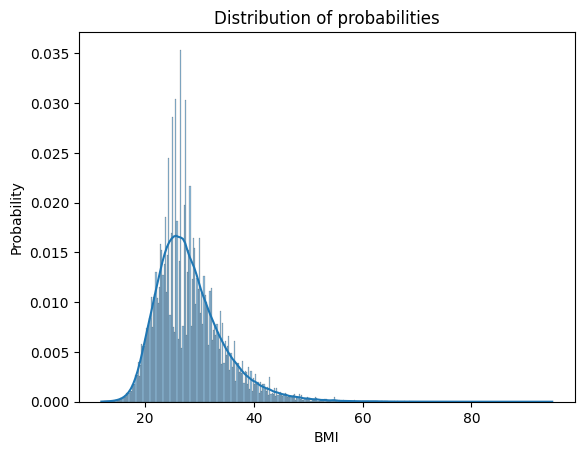

In [17]:
#Checking the distribution for the probability of BMI 
sns.histplot(data = remedial, x = 'BMI', kde = True, stat= 'probability')
plt.title('Distribution of probabilities')
plt.show()

In [15]:
#Next we try to check for the mean and median
remedial['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

From our histogram and statistics we discover that the mean is greater than the median. Hence the distribution of the probabilities of Body Mass Index are positively skewed tending towards a normal distribution.

## Number_3
## What is the probability that a person who smokes has SkinCancer?

In [49]:
joint_event = remedial[(remedial['Smoking']=='Yes')&(remedial['SkinCancer']=='Yes')]
joint_probability = len(joint_event)/len(remedial)

smokes = remedial[remedial['Smoking'] == 'Yes']
smokes_probability = len(smokes)/len(remedial)

conditional_probability = joint_probability/smokes_probability
print("The probability that a person who smokes has Skin Cancer is", conditional_probability)



The probability that a person who smokes has Skin Cancer is 0.10503532765260637


## Number_4
## Explain the relationship between any two continuous variables?

In [52]:
# Statistical relationship between BMI and PhysicalHealth
grouped_data = ['BMI', 'PhysicalHealth']
correlation = remedial[grouped_data].corr()
correlation

,BMI,PhysicalHealth
BMI,1.000000,0.109788
PhysicalHealth,0.109788,1.000000


The correlation between BMI and PhysicalHealth is 0.109788 implying a positive low correlation. Hence the relationship between BMI and PhysicalHealth is not very strong.

## Number_5
## Based on the variable “HeartDisease”, which "GenHealth" status  would you advise patients to maintain? 

GenHealth     Excellent   Fair   Good  Poor  Very good
HeartDisease                                          
No                65342  27593  83571  7439     108477
Yes                1500   7084   9558  3850       5381


Text(0.5, 1.0, 'Relationship between Heart_Disease and General_Health')

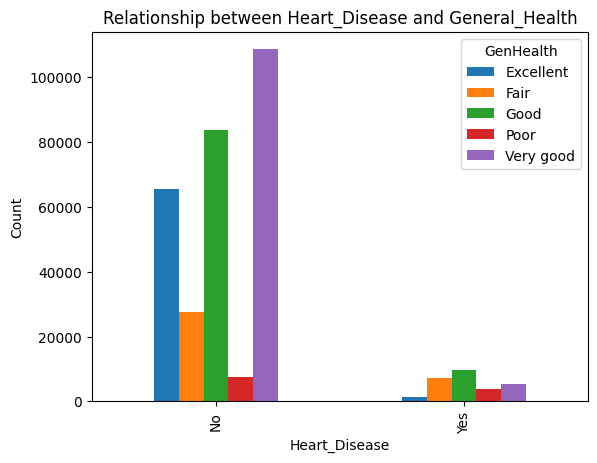

In [51]:
crosstab = pd.crosstab(index = remedial['HeartDisease'], columns=remedial['GenHealth'])
print(crosstab)
crosstab.plot.bar()
plt.xlabel('Heart_Disease')
plt.ylabel('Count')
plt.title('Relationship between Heart_Disease and General_Health')

According to the bar plot above we notice that a patient with a very good general health has a lowest chance of getting a heart disease. So I would advise patients to maintain a very good general health performance.